In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df=pd.read_csv('datasets_156197_358170_Churn_Modelling.csv')

In [28]:
df.shape

(10000, 14)

##### This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

In [29]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [30]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [31]:
df.isnull().sum()   # Checking whether there is any missing values or not

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

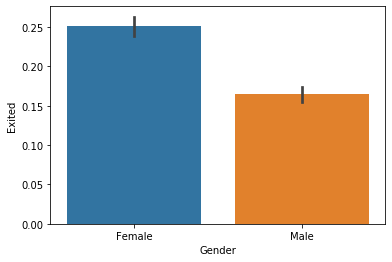

In [32]:
sns.barplot(df['Gender'],df['Exited'])

In [33]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

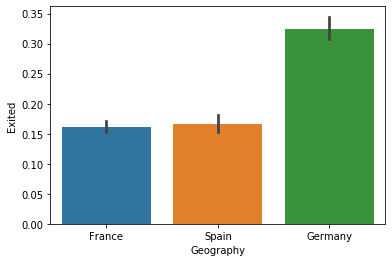

In [34]:
sns.barplot(df['Geography'],df['Exited'])

In [35]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [36]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [37]:
df['Gender']=df['Gender'].replace({'Female':0,'Male':1})

In [38]:
df['Geography']=df['Geography'].replace({'France':0,'Spain':1,'Germany':2})

In [39]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
248,634,2,1,24,8,103097.85,1,1,1,157577.29,0
687,769,2,0,45,5,126674.81,1,1,0,124118.71,1
4834,752,1,0,35,2,0.00,1,1,0,44335.54,1
2905,680,2,1,32,7,175454.00,1,0,1,77349.92,0
8164,681,1,1,38,2,99811.44,2,1,0,23531.50,0


In [40]:
#Fetching X and y

In [41]:
X=df.iloc[:,0:-1].values
y=df.iloc[:,-1].values

In [42]:
print(X.shape)
print(y.shape)

(10000, 10)
(10000,)


### Train_test_split

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

### Applying DecisionTreeClassifier 

In [44]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [45]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [46]:
y_pred=clf.predict(X_test)

### Accuracy_score

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.792

### Now applying GridSearchCV

In [56]:
param_dict={  'criterion': ['gini','entropy'],
               'max_depth' : [1,2,3,4,5,6,7,8,None],
                'random_state':[1,2,3,4,5,6,7,8,None]
    
}

In [57]:
from sklearn.model_selection import GridSearchCV

In [66]:
grid=GridSearchCV(clf,param_grid=param_dict,cv=15,n_jobs=-1)

In [67]:
grid.fit(X_train,y_train)

GridSearchCV(cv=15, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                    

In [68]:
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=4, splitter='best')

In [69]:
grid.best_score_

0.8589961422518287